In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Train and test data
df= pd.read_csv("Train1.csv")
dft = pd.read_csv("Test.csv")
df.head()


FileNotFoundError: ignored

In [0]:
#numerical features
nums = list(df._get_numeric_data().columns)

#categorical features985391826
cats = list(set(df.columns) - set(df._get_numeric_data().columns))

#Filtering
df = df[df['temperature'] != 0]

#lower case w_desc
df['weather_description'] = df['weather_description'].str.lower()
dft['weather_description'] = dft['weather_description'].str.lower()

In [0]:
# Encoding the is_holiday feature column
df['is_holiday'] = np.where(df['is_holiday']=='None', 0, 1)
dft['is_holiday'] = np.where(dft['is_holiday']=='None', 0,1)

# Encoding the weather_type feature column
df['weather_type'] =df['weather_type'].astype('category').cat.codes
dft['weather_type'] =dft['weather_type'].astype('category').cat.codes


#Converting the date_time object to represent hour of the day
df['date_time']= pd.to_datetime(df['date_time'])
df['date_time']=df['date_time'].dt.hour

dft['date_time']= pd.to_datetime(dft['date_time'])
dft['date_time']=dft['date_time'].dt.hour

In [0]:
# Finding the corelaton of all the columns with traffic_volume
df[df.columns[:]].corr()['traffic_volume'][:]

date_time              0.348709
is_holiday            -0.043100
air_pollution_index   -0.003766
humidity               0.016581
wind_speed             0.015978
wind_direction         0.014071
visibility_in_miles    0.001121
dew_point              0.001121
temperature            0.130657
rain_p_h               0.005641
snow_p_h               0.001188
clouds_all             0.037568
weather_type          -0.039807
traffic_volume         1.000000
Name: traffic_volume, dtype: float64

In [0]:
#direct influence with traffic_volume
train = ['is_holiday']
test = ['date_time','temperature','is_holiday','weather_type']
 
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,9,0,121,89,2,329,1,1,288.28,0.0,0.0,40,1,scattered clouds,5545
1,10,0,178,67,3,330,1,1,289.36,0.0,0.0,75,1,broken clouds,4516
2,11,0,113,66,3,329,2,2,289.58,0.0,0.0,90,1,overcast clouds,4767
3,12,0,20,66,3,329,5,5,290.13,0.0,0.0,90,1,overcast clouds,5026
4,13,0,281,65,3,329,7,7,291.14,0.0,0.0,75,1,broken clouds,4918


In [0]:
#df1 = df['weather_type'].astype(str).str.get_dummies(" ")
#df2 = df['is_holiday'].astype(str).str.get_dummies(" ")
df=df.drop(['weather_description','visibility_in_miles'],axis=1)
dft=dft.drop(['weather_description','visibility_in_miles'],axis=1)
#ck = pd.concat([df, df1,df2], axis=1)
#ck.drop(ck.columns[1:7],axis=1,inplace=True)
#ck.drop(ck.columns[2:5],axis=1,inplace=True)
#cols = ['date_time','0','1','2','3','4','5','6','7','8','9','10','No','Yes','traffic_volume']
#df = ck[cols]
df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,9,0,121,89,2,329,1,288.28,0.0,0.0,40,1,5545
1,10,0,178,67,3,330,1,289.36,0.0,0.0,75,1,4516
2,11,0,113,66,3,329,2,289.58,0.0,0.0,90,1,4767
3,12,0,20,66,3,329,5,290.13,0.0,0.0,90,1,5026
4,13,0,281,65,3,329,7,291.14,0.0,0.0,75,1,4918


In [0]:
dft.iloc[:,:]

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type
0,0,0,73,63,1,27,4,285.15,0.00,0,90,6
1,0,0,251,63,1,27,4,285.15,0.00,0,90,5
2,0,0,75,56,1,0,1,285.15,0.00,0,90,2
3,1,0,98,56,1,351,2,284.79,0.00,0,90,6
4,1,0,283,56,1,351,1,284.79,0.00,0,90,5
5,2,0,115,49,1,27,4,284.29,0.00,0,90,6
6,2,0,48,49,1,27,1,284.29,0.00,0,90,5
7,2,0,133,49,1,27,1,284.29,0.00,0,90,2
8,3,0,130,60,2,36,6,283.51,0.00,0,90,6
9,3,0,93,60,2,36,2,283.51,0.00,0,90,5


In [0]:
df1 = dft['weather_type'].astype(str).str.get_dummies(" ")
df2 = dft['is_holiday'].astype(str).str.get_dummies(" ")
dft=dft.drop(['weather_type','is_holiday','weather_description'],axis=1)
ck = pd.concat([dft, df1,df2], axis=1)
ck.drop(ck.columns[1:7],axis=1,inplace=True)
ck.drop(ck.columns[2:5],axis=1,inplace=True)
cols = ['date_time','0','1','2','3','4','5','6','7','8','9','No','Yes']
dft = ck[cols]
dft.head()

KeyError: ignored

In [0]:
#Train data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

#X_train = df.iloc[:,:-1]
#y_train = df.iloc[:,-1]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_test = dft.iloc[:,:]
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 9,train_size = 0.7)
#result = cross_validate(model,X,y,cv = 7,scoring='neg_mean_squared_error',return_train_score=True)


In [0]:
X_test.shape

(14454, 12)

In [0]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error

lasso_model = Lasso(alpha = 140,max_iter = 100000, random_state=9)
lasso_model.fit(X_train,y_train) #Lasso model
y_pred = lasso_model.predict(X_test)
from sklearn.metrics import mean_squared_log_error
print("Results: %.2f) MSE" % (np.sqrt(mean_squared_log_error(y_test, y_pred))))


Results: 0.95) MSE


In [0]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,mean_absolute_error
rmse_val = [] #to store rmse values for different k
for K in range(0,50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_log_error(y_test, y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSLE value for k= ' , K , 'is:', error)

RMSLE value for k=  1 is: 0.9477558044941978
RMSLE value for k=  2 is: 0.9477558044941978
RMSLE value for k=  3 is: 0.9477558044941978
RMSLE value for k=  4 is: 0.9477558044941978
RMSLE value for k=  5 is: 0.9477558044941978
RMSLE value for k=  6 is: 0.9477558044941978
RMSLE value for k=  7 is: 0.9477558044941978
RMSLE value for k=  8 is: 0.9477558044941978
RMSLE value for k=  9 is: 0.9477558044941978


KeyboardInterrupt: ignored

In [0]:
#df.describe()
df[df['traffic_volume']<100].head(20)


,date_time,0,1,2,3,4,5,6,7,8,9,10,No,Yes,traffic_volume
16837,22,0,1,0,0,0,0,0,0,0,0,0,1,0,65
16849,8,1,0,0,0,0,0,0,0,0,0,0,1,0,1
16850,9,1,0,0,0,0,0,0,0,0,0,0,1,0,1
24818,20,0,1,0,0,0,0,0,0,0,0,0,1,0,97
24819,21,1,0,0,0,0,0,0,0,0,0,0,1,0,10
24820,22,1,0,0,0,0,0,0,0,0,0,0,1,0,11
24821,23,0,1,0,0,0,0,0,0,0,0,0,1,0,1
25155,22,1,0,0,0,0,0,0,0,0,0,0,1,0,64
25156,23,1,0,0,0,0,0,0,0,0,0,0,1,0,10
25157,0,0,0,0,0,0,1,0,0,0,0,0,1,0,6


In [0]:
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(X, y)
y_predicted = model.predict(X_test)
#y_predicted = np.round(y_predicted).astype(int)
# The mean squared error
#print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
#print("Results: %.5f RMSLE" % (np.sqrt(mean_squared_log_error(y_test, y_predicted))))
#print(pd.DataFrame(y_predicted,y_test))


In [0]:
df.head()
Results: 0.44830 RMSLE

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,traffic_volume
0,9,0,121,89,2,329,1,1,288.28,0.0,0.0,40,1,5545
1,10,0,178,67,3,330,1,1,289.36,0.0,0.0,75,1,4516
2,11,0,113,66,3,329,2,2,289.58,0.0,0.0,90,1,4767
3,12,0,20,66,3,329,5,5,290.13,0.0,0.0,90,1,5026
4,13,0,281,65,3,329,7,7,291.14,0.0,0.0,75,1,4918


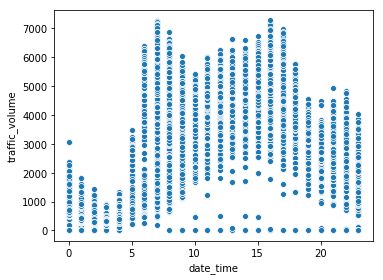

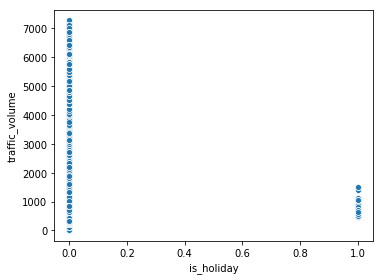

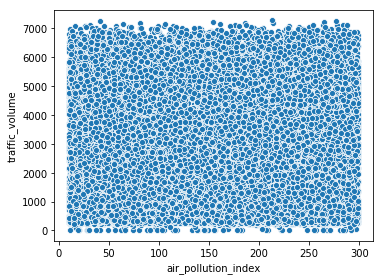

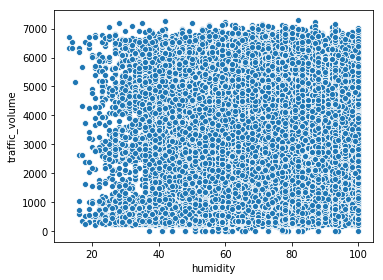

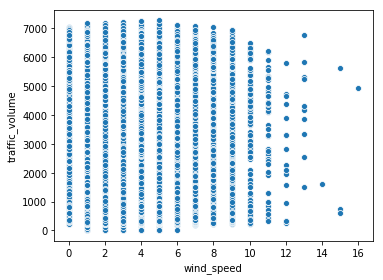

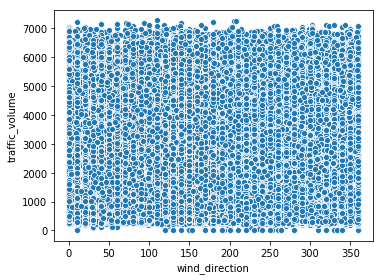

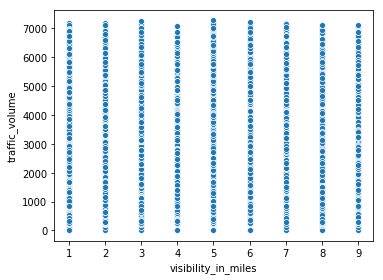

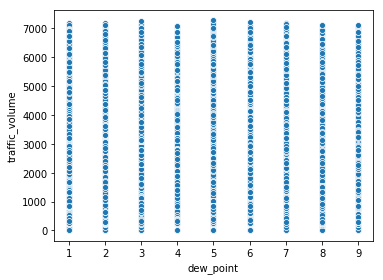

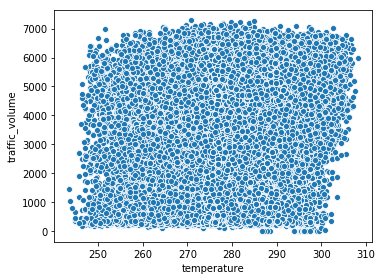

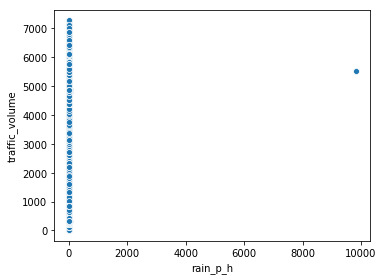

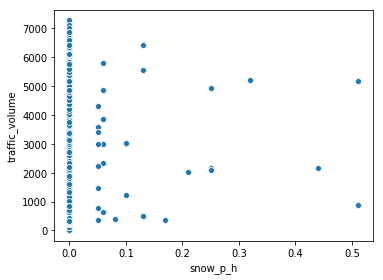

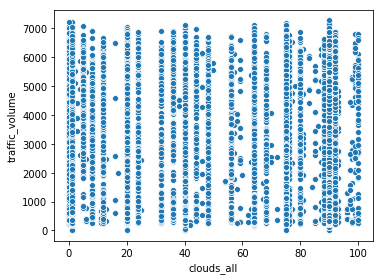

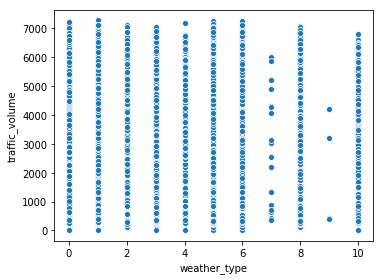

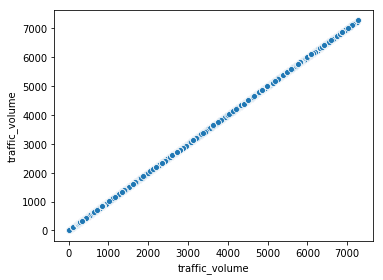

In [0]:
for i in df.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.scatterplot(df[i],df['traffic_volume'])
    #plt.subplot(122)
    #sns.scatterplot(df[i],df['traffic_volume'])
    #plt.title(i,' Plot')
    # Set x-axis label
    plt.xlabel(i)
    # Set y-axis label
    plt.ylabel('traffic_volume')
    plt.tight_layout()
    plt.show()

In [0]:
#plt.scatter(X_test, y_test)
#plt.plot(X_test, y_pred, color='red')
plt.scatter(X,y)
plt.show()

In [0]:
dft.shape

(14454, 14)

In [0]:
dft = pd.read_csv("Test.csv")
final = {'date_time':dft['date_time'],'traffic_volume':np.round(y_predicted).astype(int)}
final = pd.DataFrame(final)
final.to_csv('Submission.csv',index = False)